In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import PIL.Image
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.18.1


In [5]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Programming\ML\machine-learning\box_assigner\Titanic---project-1


In [9]:
import pathlib

dir = 'c:/Programming/ML/machine-learning/box_assigner/flower_photo/train'
data_dir = pathlib.Path(dir).with_suffix('')

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2746


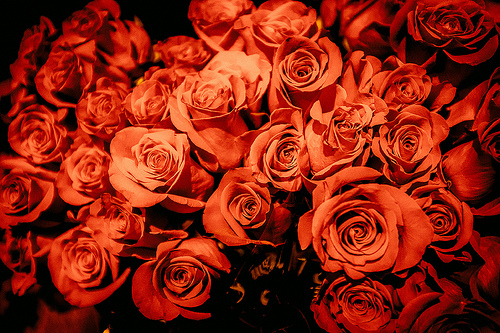

In [12]:
roses = list(data_dir.glob('rose/*'))
PIL.Image.open(str(roses[1]))

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(180,180),
    batch_size=32
)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(180,180),
    batch_size=32
)

Found 2746 files belonging to 5 classes.
Using 549 files for validation.


In [33]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

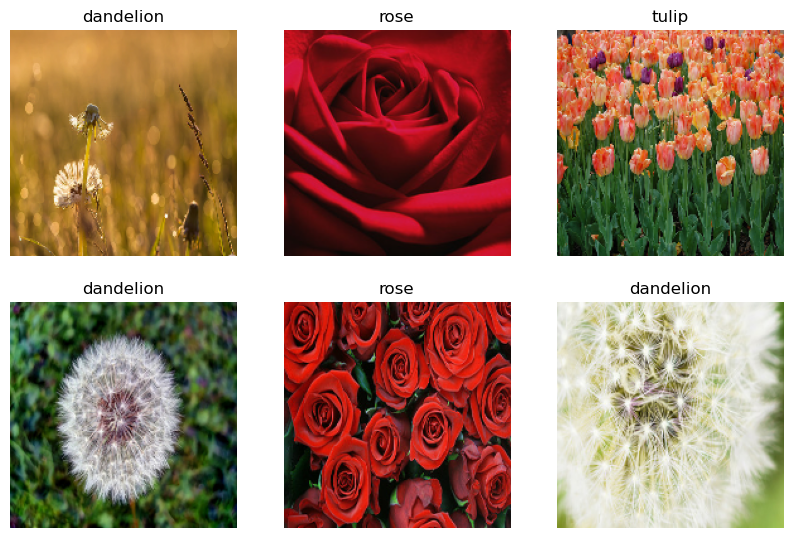

In [22]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()
        
        


In [24]:
print(train_ds)

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
(32, 180, 180, 3)
(32,)


In [27]:
normalization_layer = tf.keras.layers.Rescaling(1/255.0)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
print(image_batch.numpy().min(), image_batch.numpy().max())

first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))



0.0 1.0
0.0 0.9997277


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
num_classes = 5
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling(1.0/255.0),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(num_classes)
 ])

In [44]:
model.compile(
    optimizer=Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics= ['accuracy']
    )

In [47]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 27s 389ms/step - accuracy: 0.7146 - loss: 0.7620 - val_accuracy: 0.6138 - val_loss: 0.9642
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 27s 389ms/step - accuracy: 0.7956 - loss: 0.5615 - val_accuracy: 0.6248 - val_loss: 0.9743
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 402ms/step - accuracy: 0.8616 - loss: 0.3993 - val_accuracy: 0.6357 - val_loss: 1.0964
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 27s 396ms/step - accuracy: 0.9176 - loss: 0.2415 - val_accuracy: 0.6302 - val_loss: 1.3062
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 27s 397ms/step - accuracy: 0.9508 - loss: 0.1644 - val_accuracy: 0.6175 - val_loss: 1.3648


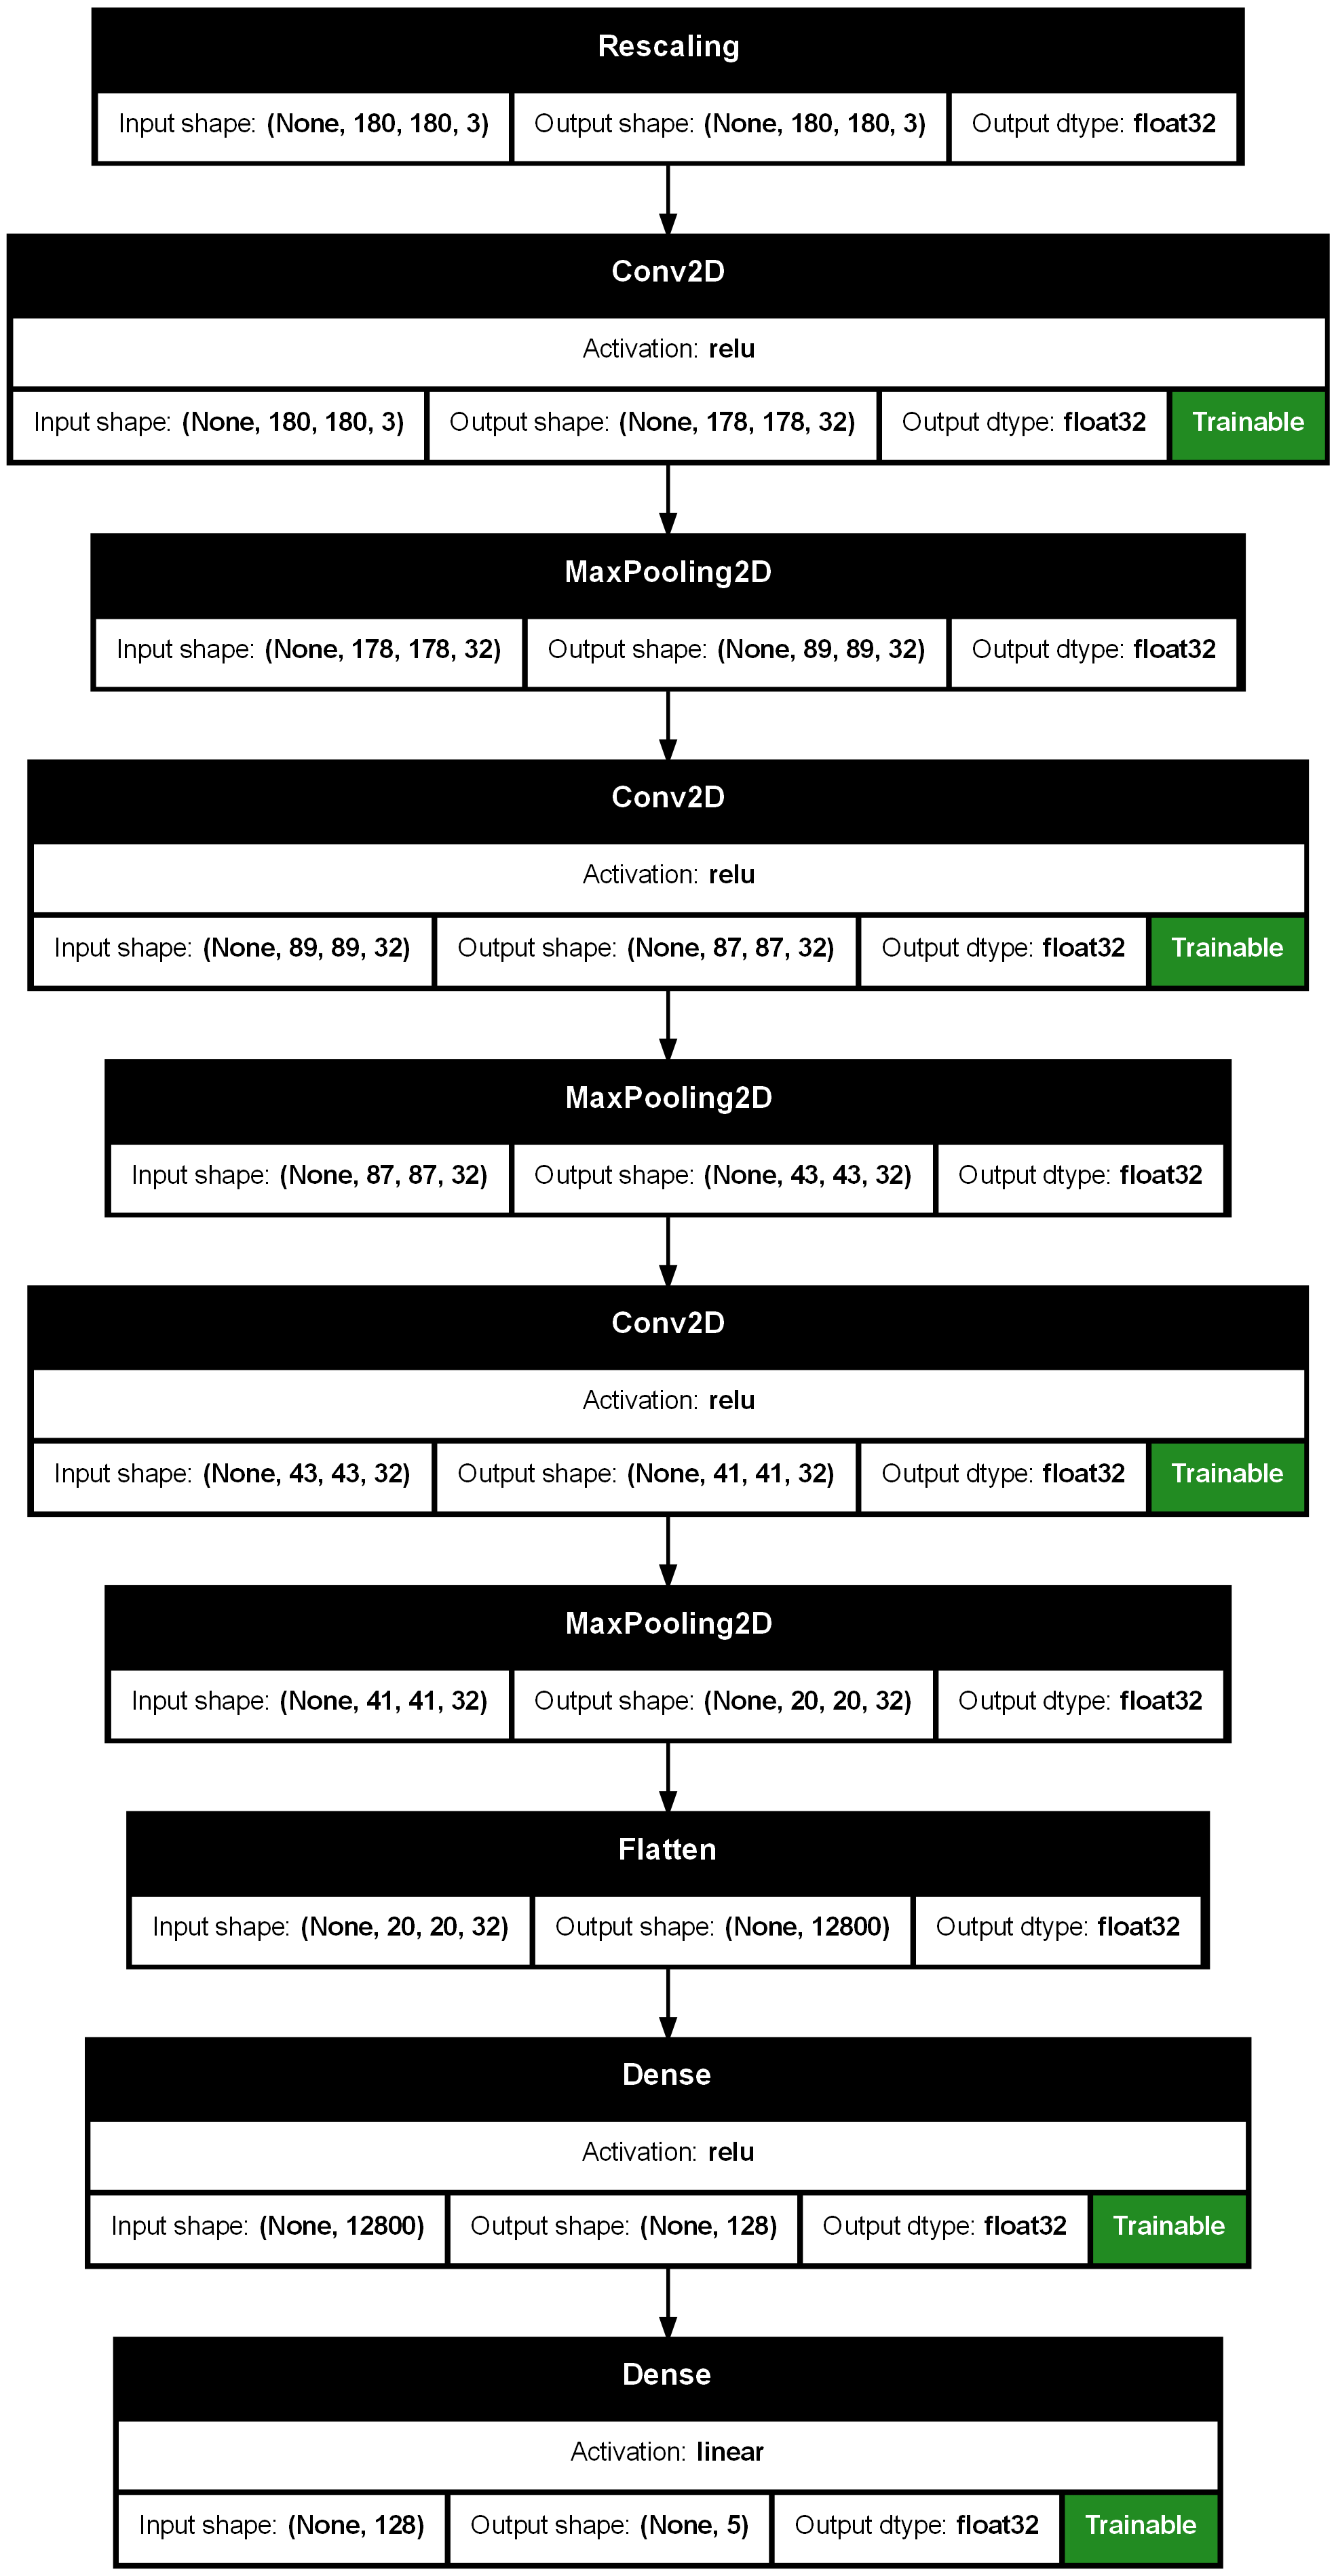

In [48]:
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True, show_trainable=True, show_dtype=True)